In [ ]:


import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import accuracy_score, precision_score, recall_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from sklearn.model_selection import train_test_split




# Load the dataset
file_path = '/content/Truth_Seeker_Model_Dataset.csv'
dataset = pd.read_csv(file_path)

# Preprocess the text data
statements = dataset['statement'].astype(str).values
tweets = dataset['tweet'].astype(str).values
labels = dataset['BinaryNumTarget'].astype(int).values

# Combine statements and tweets into one feature
combined_text = [s + " " + t for s, t in zip(statements, tweets)]


vocab_size = 20000
embedding_dim = 100
max_length = 500
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<OOV>"

# Tokenizer and padding
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(combined_text)
sequences = tokenizer.texts_to_sequences(combined_text)
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Split the data
train_texts, test_texts, train_labels, test_labels = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

# Model definition
model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    Conv1D(256, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# Train the model
history = model.fit(train_texts, train_labels, epochs=10, validation_split=0.2, batch_size=32)




# Make predictions

y_pred_prob = model.predict(padded_sequences)
y_pred = (y_pred_prob > 0.5).astype(int)


accuracy = accuracy_score(labels, y_pred)
precision = precision_score(labels, y_pred)
recall = recall_score(labels, y_pred)


print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 100)          2000000   
                                                                 
 conv1d_1 (Conv1D)           (None, 496, 256)          128256    
                                                                 
 global_max_pooling1d_1 (Gl  (None, 256)               0         
 obalMaxPooling1D)                                               
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                      

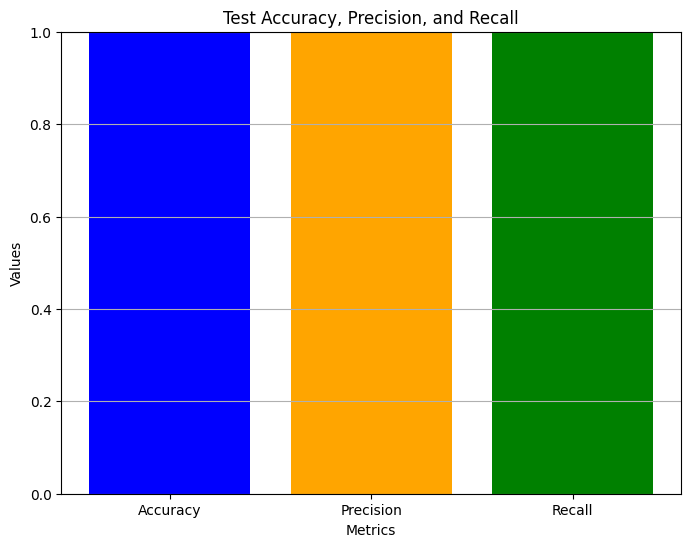

In [ ]:


import matplotlib.pyplot as plt

# Test metrics
metrics = ['Accuracy', 'Precision', 'Recall']
values = [0.9998, 0.9998, 0.9998]

# Plotting the bar graph
plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['blue', 'orange', 'green'])
plt.ylim(0, 1)  # Set the y-axis limit from 0 to 1
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Test Accuracy, Precision, and Recall')
plt.grid(axis='y')
plt.show()

